In [1]:
from train_unet import *

In [2]:
val(0)

Validation epoch 0: avg_dice_loss = 1.004911038057128, avg_iou = 0.008700475071681969, avg_acc = 0.017060181259441733


(1.004911038057128, 0.008700475071681969)

In [3]:
train_loss, val_loss = train()

starting training
epoch0, iter0, loss: 1.0033514499664307
epoch0, iter120, loss: 0.8239880204200745
epoch0, iter240, loss: 0.8044737577438354
epoch0, iter360, loss: 0.7916576862335205
epoch0, iter480, loss: 0.7818570137023926
epoch0, iter600, loss: 0.7924247980117798
Finish epoch 0, time elapsed 42.30910325050354
Validation epoch 0: avg_dice_loss = 0.7779607397406848, avg_iou = 0.5419200027166907, avg_acc = 0.686770093707896
best val loss achieved, saving model
--------------------
epoch1, iter0, loss: 0.9574962854385376
epoch1, iter120, loss: 0.7906274795532227
epoch1, iter240, loss: 0.7945308685302734
epoch1, iter360, loss: 0.7681799530982971
epoch1, iter480, loss: 0.7560234665870667
epoch1, iter600, loss: 0.7680906057357788
Finish epoch 1, time elapsed 41.893346071243286
Validation epoch 1: avg_dice_loss = 0.7453797760294445, avg_iou = 0.5945920349946663, avg_acc = 0.7327786515008158
best val loss achieved, saving model
--------------------
epoch2, iter0, loss: 0.7715479135513306
ep

epoch18, iter240, loss: 0.5977280139923096
epoch18, iter360, loss: 0.5943120718002319
epoch18, iter480, loss: 0.6653215885162354
epoch18, iter600, loss: 0.586449384689331
Finish epoch 18, time elapsed 42.92675423622131
Validation epoch 18: avg_dice_loss = 0.7162416123632175, avg_iou = 0.6494013248984494, avg_acc = 0.7772929986911034
--------------------
epoch19, iter0, loss: 0.5747970342636108
epoch19, iter120, loss: 0.626078724861145
epoch19, iter240, loss: 0.5851987600326538
epoch19, iter360, loss: 0.6056959629058838
epoch19, iter480, loss: 0.6010727882385254
epoch19, iter600, loss: 0.6063040494918823
Finish epoch 19, time elapsed 41.34363031387329
Validation epoch 19: avg_dice_loss = 0.7130861419350354, avg_iou = 0.6682315507931496, avg_acc = 0.7917334024585895
--------------------
epoch20, iter0, loss: 0.6907840371131897
epoch20, iter120, loss: 0.6219958662986755
epoch20, iter240, loss: 0.5815545916557312
epoch20, iter360, loss: 0.5775730609893799
epoch20, iter480, loss: 0.57855868

epoch37, iter0, loss: 0.578624427318573
epoch37, iter120, loss: 0.5929117202758789
epoch37, iter240, loss: 0.5935990214347839
epoch37, iter360, loss: 0.5267578959465027
epoch37, iter480, loss: 0.5977354049682617
epoch37, iter600, loss: 0.5401227474212646
Finish epoch 37, time elapsed 40.75237989425659
Validation epoch 37: avg_dice_loss = 0.7226530180048587, avg_iou = 0.6713824684940167, avg_acc = 0.7940836966927372
--------------------
epoch38, iter0, loss: 0.5831978917121887
epoch38, iter120, loss: 0.5627628564834595
epoch38, iter240, loss: 0.575468897819519
epoch38, iter360, loss: 0.56507408618927
epoch38, iter480, loss: 0.5133368968963623
epoch38, iter600, loss: 0.5085242986679077
Finish epoch 38, time elapsed 41.40432047843933
Validation epoch 38: avg_dice_loss = 0.7207089413457842, avg_iou = 0.6733419596259274, avg_acc = 0.7952268383396206
--------------------
epoch39, iter0, loss: 0.5619124174118042
epoch39, iter120, loss: 0.5034917593002319
epoch39, iter240, loss: 0.620294570922

epoch56, iter480, loss: 0.5952929258346558
epoch56, iter600, loss: 0.5502556562423706
Finish epoch 56, time elapsed 40.747546434402466
Validation epoch 56: avg_dice_loss = 0.7254395687758033, avg_iou = 0.6738348354154559, avg_acc = 0.7959222202870383
--------------------
epoch57, iter0, loss: 0.5569813251495361
epoch57, iter120, loss: 0.5912100672721863
epoch57, iter240, loss: 0.587834358215332
epoch57, iter360, loss: 0.4918704032897949
epoch57, iter480, loss: 0.5304466485977173
epoch57, iter600, loss: 0.563077449798584
Finish epoch 57, time elapsed 41.15696167945862
Validation epoch 57: avg_dice_loss = 0.7265627186689804, avg_iou = 0.673164106393928, avg_acc = 0.795415414980988
--------------------
epoch58, iter0, loss: 0.5520524978637695
epoch58, iter120, loss: 0.5598850846290588
epoch58, iter240, loss: 0.4443468451499939
epoch58, iter360, loss: 0.5714321732521057
epoch58, iter480, loss: 0.51050865650177
epoch58, iter600, loss: 0.5530819296836853
Finish epoch 58, time elapsed 41.9351

epoch75, iter0, loss: 0.5459538102149963
epoch75, iter120, loss: 0.5280905365943909
epoch75, iter240, loss: 0.5493758916854858
epoch75, iter360, loss: 0.562638521194458
epoch75, iter480, loss: 0.47432124614715576
epoch75, iter600, loss: 0.4742717146873474
Finish epoch 75, time elapsed 41.62583780288696
Validation epoch 75: avg_dice_loss = 0.7300143261453998, avg_iou = 0.671229212853446, avg_acc = 0.7936085145864914
--------------------
epoch76, iter0, loss: 0.5570398569107056
epoch76, iter120, loss: 0.4828241467475891
epoch76, iter240, loss: 0.49470198154449463
epoch76, iter360, loss: 0.5395365953445435
epoch76, iter480, loss: 0.5023998618125916
epoch76, iter600, loss: 0.5269410610198975
Finish epoch 76, time elapsed 42.2047598361969
Validation epoch 76: avg_dice_loss = 0.7292210763959742, avg_iou = 0.6710181955970935, avg_acc = 0.7933843787036725
--------------------
epoch77, iter0, loss: 0.5818694233894348
epoch77, iter120, loss: 0.5581511855125427
epoch77, iter240, loss: 0.533447623

Validation epoch 93: avg_dice_loss = 0.7301862488931684, avg_iou = 0.66894552867804, avg_acc = 0.7921427783681385
--------------------
epoch94, iter0, loss: 0.5683091878890991
epoch94, iter120, loss: 0.5062351226806641
epoch94, iter240, loss: 0.5686702728271484
epoch94, iter360, loss: 0.5062811374664307
epoch94, iter480, loss: 0.5318195819854736
epoch94, iter600, loss: 0.5639187693595886
Finish epoch 94, time elapsed 40.66989612579346
Validation epoch 94: avg_dice_loss = 0.731966106927217, avg_iou = 0.6740523683491038, avg_acc = 0.7957817237768601
--------------------
epoch95, iter0, loss: 0.5257295370101929
epoch95, iter120, loss: 0.5561873316764832
epoch95, iter240, loss: 0.6024501323699951
epoch95, iter360, loss: 0.5929776430130005
epoch95, iter480, loss: 0.5494774580001831
epoch95, iter600, loss: 0.5487719774246216
Finish epoch 95, time elapsed 41.463812828063965
Validation epoch 95: avg_dice_loss = 0.7305327815796012, avg_iou = 0.6697395815778134, avg_acc = 0.7927691363576633
----

In [4]:
def plot_loss_curves(train_loss,val_loss):
    title = "Loss 5c - Unet"
    fig_name = "Loss_unet_dice.jpg"
    x = [i for i in range(len(train_loss))]
    plt.plot(x, train_loss,label="Train Loss")
    plt.plot(x, val_loss,label="Validation Loss")
    plt.legend()
    plt.xlabel("# of epoch")
    plt.ylabel("Dice Loss")
    plt.grid(True)
    plt.title(title)
    plt.savefig(fig_name, dpi=300)
    plt.show()

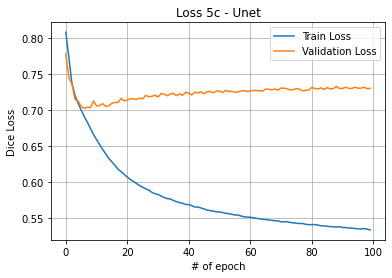

In [5]:
plot_loss_curves(train_loss,val_loss)

Final test from best model : avg_iou = 0.6594151877645237, avg_acc = 0.7846241730362622
 Class wise ious getting saved in unet_IOU_Classwise.csv file


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


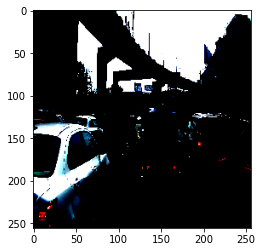

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


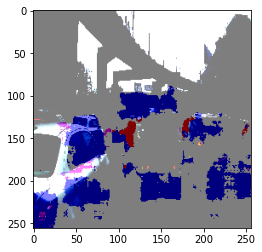

In [6]:
test()